<a href="https://colab.research.google.com/github/benasphy/k-means/blob/main/Gene%20cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

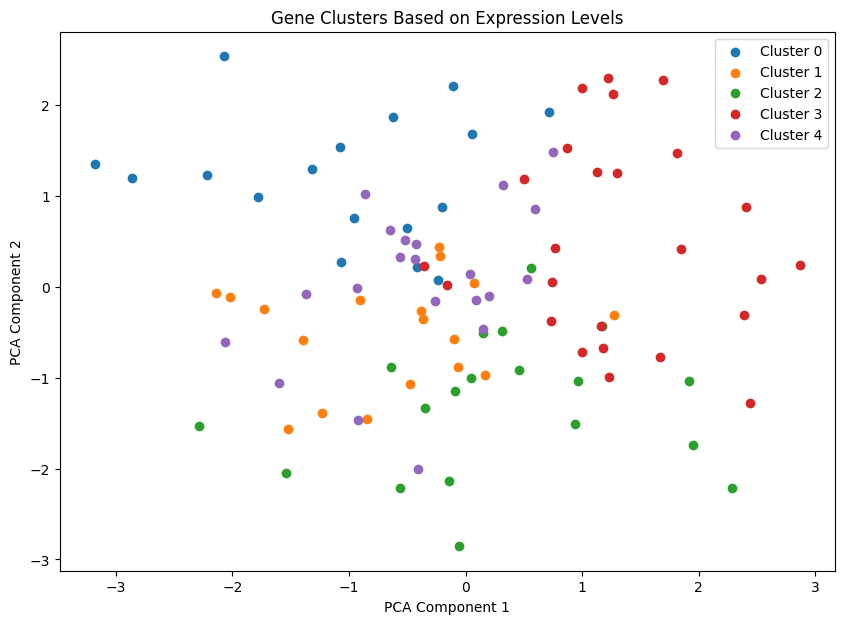

Clustered Genetic Data (first 10 genes):
   Condition_1  Condition_2  Condition_3  Condition_4  Condition_5  \
0    37.454012    95.071431    73.199394    59.865848    15.601864   
1     2.058449    96.990985    83.244264    21.233911    18.182497   
2    61.185289    13.949386    29.214465    36.636184    45.606998   
3    60.754485    17.052412     6.505159    94.888554    96.563203   
4    12.203823    49.517691     3.438852    90.932040    25.877998   
5    96.958463    77.513282    93.949894    89.482735    59.789998   
6    38.867729    27.134903    82.873751    35.675333    28.093451   
7    77.224477    19.871568     0.552212    81.546143    70.685734   
8    86.310343    62.329813    33.089802     6.355835    31.098232   
9    11.959425    71.324479    76.078505    56.127720    77.096718   

   Condition_6  Condition_7  Condition_8  Condition_9  Condition_10  cluster  \
0    15.599452     5.808361    86.617615    60.111501     70.807258        3   
1    18.340451    30.424224 

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic gene expression data
# Rows represent genes, columns represent different experimental conditions
np.random.seed(42)
n_genes = 100  # Number of genes
n_conditions = 10  # Number of experimental conditions

# Simulate gene expression data where values are expression levels
gene_expression_data = np.random.rand(n_genes, n_conditions) * 100

# Convert to a DataFrame for easy handling
gene_df = pd.DataFrame(gene_expression_data, columns=[f"Condition_{i+1}" for i in range(n_conditions)])

# Standardize the data
scaler = StandardScaler()
gene_df_scaled = scaler.fit_transform(gene_df)

# Apply k-means clustering
# Here we set the number of clusters to an arbitrary number, say 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
gene_df['cluster'] = kmeans.fit_predict(gene_df_scaled)

# Visualize the clusters in 2D space using PCA (Principal Component Analysis)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(gene_df_scaled)
gene_df['PCA1'] = pca_result[:, 0]
gene_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 7))
for i in range(n_clusters):
    cluster_data = gene_df[gene_df['cluster'] == i]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f"Cluster {i}")

plt.title("Gene Clusters Based on Expression Levels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# Display clustered gene data
print("Clustered Genetic Data (first 10 genes):")
print(gene_df.head(10))